In [24]:
import pandas as pd 
import mlflow 

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score 

In [25]:
print(f'The current MLFlow version: {mlflow.__version__}')

The current MLFlow version: 2.22.0


In [26]:
mlflow.set_tracking_uri("http://127.0.0.1:5001")
mlflow.set_experiment('wine_model')

<Experiment: artifact_location='mlflow-artifacts:/1', creation_time=1745739033781, experiment_id='1', last_update_time=1745739033781, lifecycle_stage='active', name='wine_model', tags={}>

In [27]:
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [28]:
# Specify target and feature values 
y = wine.target
X = df_wine

# Fit model 
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=4)

In [29]:
# Predict values 
score = accuracy_score(y, dt.predict(df_wine))
print(f'Accuracy score: {score:.4f}')

Accuracy score: 0.9888


In [30]:
# Train with Descion Tree 

with mlflow.start_run(): 
    # Log parameters and metrics 

    mlflow.set_tags({"Model": "decision-tree", "Train Data": "all-data"})

    tree_depth = 5 
    dt = DecisionTreeClassifier(max_depth=tree_depth)
    dt.fit(X, y)
    acc = accuracy_score(y, dt.predict(df_wine))

    mlflow.log_param('max_depth', tree_depth)
    mlflow.log_metric('accuracy', acc)

mlflow.end_run()

🏃 View run upbeat-cub-298 at: http://127.0.0.1:5001/#/experiments/1/runs/80352ab7895b4d7b989d73d2013ae1b7
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/1


In [31]:
from sklearn.ensemble import RandomForestClassifier

# Train with Random Forest 
with mlflow.start_run():

    mlflow.set_tags({"Model": "random-forest", "Train Data": "all-data"})

    ntree = 1000
    mtry = 4 

    mlflow.log_param('n_estimators', ntree)
    mlflow.log_param('max_features', mtry)

    rf = RandomForestClassifier(n_estimators = ntree, max_features = mtry, oob_score = True)
    rf.fit(X, y)
    # acc = rf.oob_score_
    acc = accuracy_score(y, rf.predict(X))

    mlflow.log_metric('accuracy', acc)

mlflow.end_run()


🏃 View run clean-shark-475 at: http://127.0.0.1:5001/#/experiments/1/runs/8115922a7e984997b0490301ef7b2674
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/1


In [32]:
ntrees = [20, 40, 60, 80, 100]
mtrys = [3, 4, 5]

for i in ntrees:
    for j in mtrys:
        with mlflow.start_run():
            mlflow.set_tags({"Model": "randon-forest", "Train-data":"all-data"})

            mlflow.log_params({"n_estimators": i, "max_features": j})

            rf = RandomForestClassifier(n_estimators=i, max_features=j, oob_score=True)
            rf.fit(X, y)
            acc = rf.oob_score_

            mlflow.log_metric('accuracy', acc)
        mlflow.end_run()

🏃 View run glamorous-trout-686 at: http://127.0.0.1:5001/#/experiments/1/runs/25d316e17dae4704a5039f5f075bac3c
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/1
🏃 View run honorable-ant-541 at: http://127.0.0.1:5001/#/experiments/1/runs/f006da8f638341c4855330398d398354
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/1
🏃 View run chill-shrimp-380 at: http://127.0.0.1:5001/#/experiments/1/runs/c599a1705e7e457db3882ab1db59438a
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/1
🏃 View run wise-squid-235 at: http://127.0.0.1:5001/#/experiments/1/runs/e1d0a2b96dc84c6d8f86c831bce32653
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/1
🏃 View run adorable-squid-954 at: http://127.0.0.1:5001/#/experiments/1/runs/f0a5f7e36d3b49a6b291a03b12d8e3e9
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/1
🏃 View run loud-robin-187 at: http://127.0.0.1:5001/#/experiments/1/runs/5bcf8467fb924c2c8e48beb6a1528b19
🧪 View experiment at: http://127.0.0.1:5001/#/expe

## Training a model with mlflow and hyperopt

In [33]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


In [34]:
def objective(params): 
    with mlflow.start_run():
        
        classifier_type = params['type']
        del params['type']
        if classifier_type == 'dt': 
            clf = DecisionTreeClassifier(**params)
        elif classifier_type == 'rf':
            clf = RandomForestClassifier(**params)
        else:
            return 0
        acc = cross_val_score(clf, X, y).mean()

        mlflow.set_tag("Model", classifier_type)
        mlflow.log_params(params)
        mlflow.log_metric("accuracy", acc)
        mlflow.end_run()
        return {'loss': -acc, 'status': STATUS_OK}
    
search_space = hp.choice('classifier_type', [
    {
        'type': 'dt',
        'criterion': hp.choice('dtree_criterion', ['gini', 'entropy']),
        'max_depth': hp.choice('dtree_max_depth', [None, hp.randint('dtree_max_depth_int', 1, 10)]),
        'min_samples_split': hp.randint('dtree_min_samples_split', 2, 10)
    },
    {
        'type': 'rf',
        'n_estimators': hp.randint('rf_n_estimators', 20, 500),
        'max_features': hp.randint('rf_max_features', 2, 9),
        'criterion': hp.choice('criterion', ['gini', 'entropy'])
    }
])


algo = tpe.suggest
trials = Trials()

In [35]:
best_result = fmin(
    fn=objective,
    space=search_space,
    algo=algo,
    max_evals=32,
    trials=trials
)

🏃 View run treasured-fawn-113 at: http://127.0.0.1:5001/#/experiments/1/runs/2c44fac245a1420c88f38852c43eddb9

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/1

🏃 View run trusting-dove-197 at: http://127.0.0.1:5001/#/experiments/1/runs/d9503b9b468147bd84b9ce764c9e3444

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/1                     

🏃 View run secretive-gnu-705 at: http://127.0.0.1:5001/#/experiments/1/runs/b1b625768a574756b5b85b9a8d88a4c3

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/1                     

🏃 View run luminous-whale-822 at: http://127.0.0.1:5001/#/experiments/1/runs/7232ccbc54154963a6114b196e4f0929

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/1                     

🏃 View run smiling-jay-148 at: http://127.0.0.1:5001/#/experiments/1/runs/d5dd3c94d303444295f0bc46eeef4fbd

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/1                     

🏃 View run wistful-rat-952 at: http://127.0.0.1:5001/#/experi

In [36]:
best_result

{'classifier_type': np.int64(1),
 'criterion': np.int64(0),
 'rf_max_features': np.int64(2),
 'rf_n_estimators': np.int64(344)}

### Using Autologging 

In [37]:
import mlflow.sklearn
import mlflow.sklearn


with mlflow.start_run():
    mlflow.sklearn.autolog()
    tree_depth = 5
    dt = DecisionTreeClassifier(max_depth=tree_depth)
    dt.fit(X_train, y_train)
    mlflow.sklearn.autolog(disable=True)
mlflow.end_run()

🏃 View run unruly-slug-794 at: http://127.0.0.1:5001/#/experiments/1/runs/065ccfe7eb404c339082196617c056f6
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/1


## Artifact Tracking and Model Registry 

In [44]:
import os 
os.makedirs('../save_data', exist_ok=True)
X_train.to_parquet('../save_data/x_train.parquet')
mlflow.log_artifact('../save_data/x_train.parquet')

In [45]:
X_test.to_parquet('../save_data/x_test.parquet')
mlflow.log_artifacts('../save_data/')

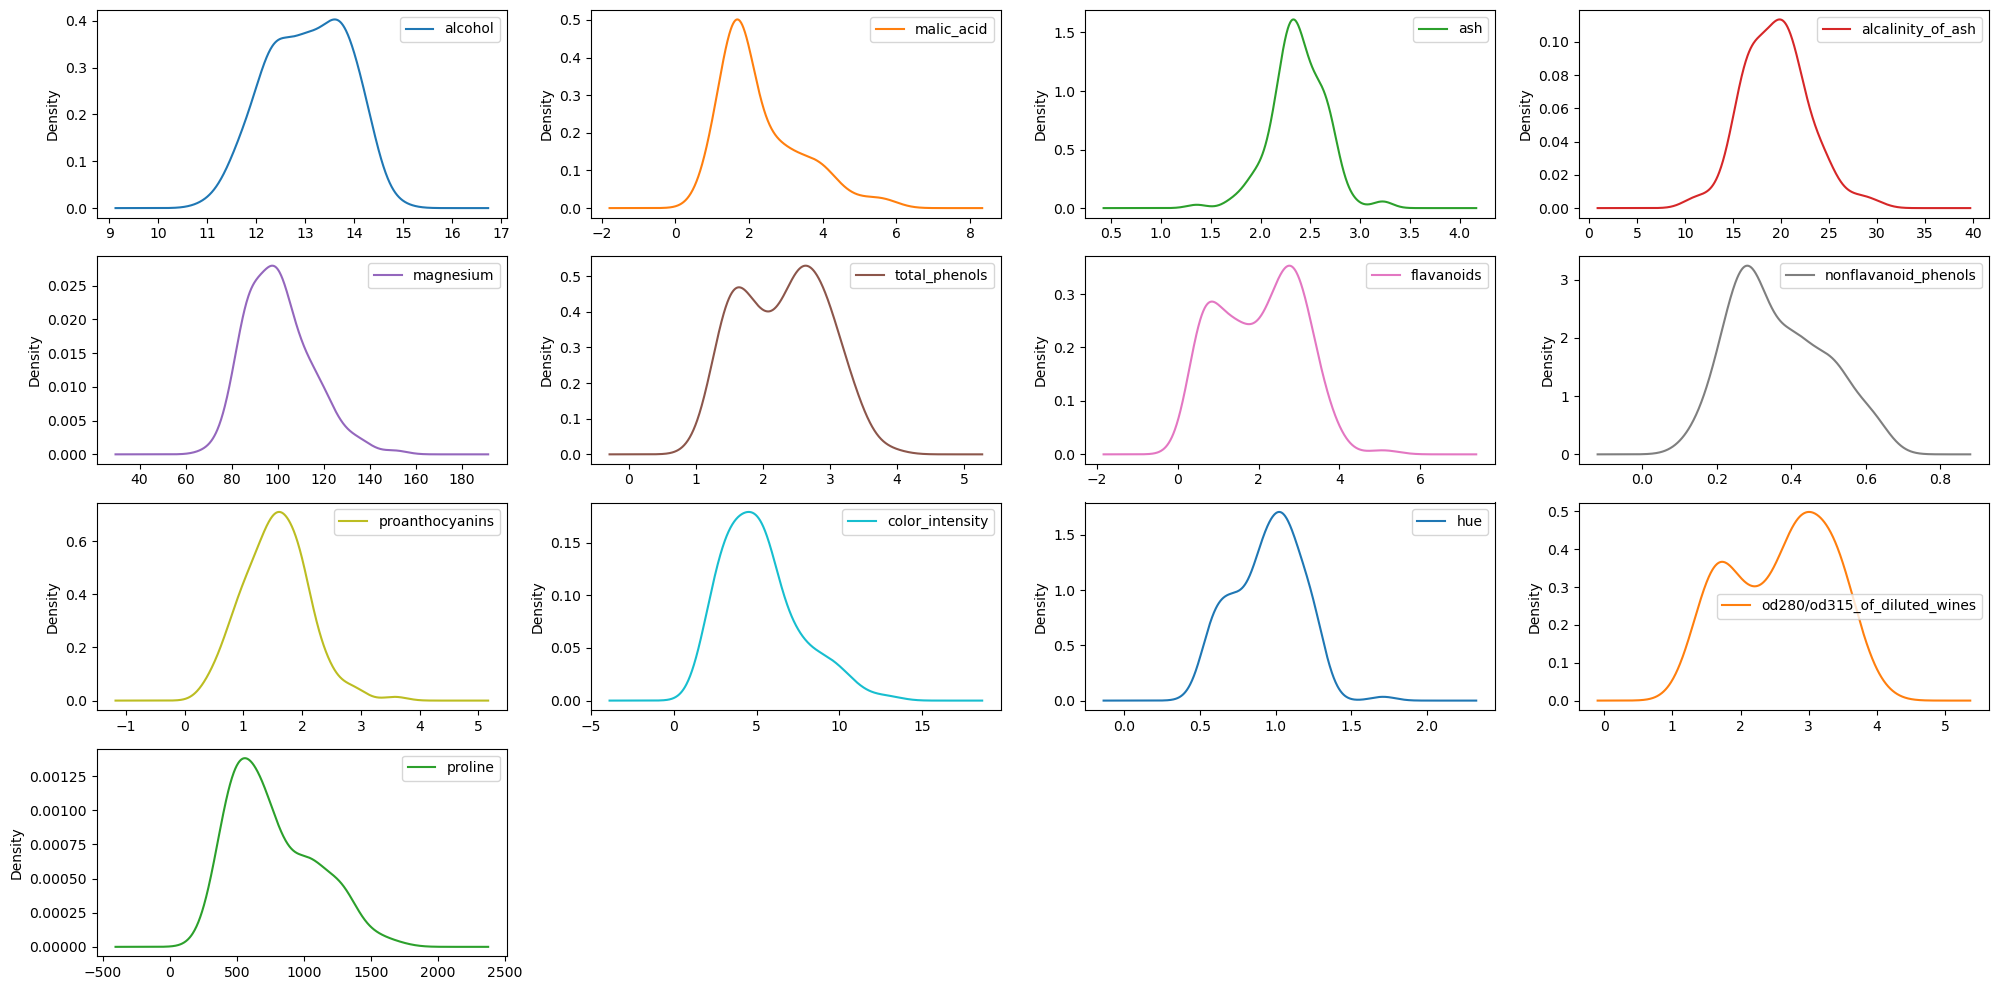

In [46]:
import matplotlib.pyplot as plt 

os.makedirs('../images', exist_ok=True)
X_train.plot.density(subplots=True, figsize=(20, 10), layout=(4, 4), sharey=False, sharex=False)


plt.tight_layout()
plt.savefig('../images/density_plot.png')

In [47]:
mlflow.log_artifacts('../images')
mlflow.end_run()

🏃 View run upset-bird-204 at: http://127.0.0.1:5001/#/experiments/1/runs/247dcd061779470ebf2761144edfa9da
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/1


In [48]:
# Loggging as a artifact 
import pickle 

os.makedirs('../models', exist_ok=True)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

with open('../models/model.pkl', 'wb') as f: 
    pickle.dump(dt, f)

mlflow.log_artifact('../models/model.pkl', artifact_path='my_model')


In [49]:
# Logging as a model 

mlflow.sklearn.log_model(dt, artifact_path='better_models')
mlflow.end_run()

2025/04/29 12:27:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run powerful-gnat-558 at: http://127.0.0.1:5001/#/experiments/1/runs/059b0a6b3dd54baa9e35632ae4313b20
🧪 View experiment at: http://127.0.0.1:5001/#/experiments/1


In [51]:
## Log files in a new demo experiment 

import mlflow.sentence_transformers
import mlflow.sklearn
import mlflow.sklearn


mlflow.set_experiment('demo-experiment-2')
def objective(params):
    with mlflow.start_run():
        classifier_type = params['type']
        del params['type']
        if classifier_type == 'dt':
            clf = DecisionTreeClassifier(**params)
        if classifier_type == 'rf':
            clf = RandomForestClassifier(**params)
        else: 
            return 0 
        acc = cross_val_score(clf, X, y).mean()

        mlflow.set_tag('Model', classifier_type)
        mlflow.log_params(params)
        mlflow.log_metric('accuracy', acc)
        mlflow.sklearn.log_model(clf, artifact_path='better_models')
        mlflow.end_run()
        return {'loss': -acc, 'status': STATUS_OK}

search_space = hp.choice('classifier_type', [
    {
        'type': 'dt',
        'criterion': hp.choice('dtree_criterion', ['gini', 'entropy']),
        'max_depth': hp.choice('dtree_max_depth', [None, hp.randint('dtree_max_depth_int', 1,10)]),
        'min_samples_split': hp.randint('dtree_min_samples_split', 2,10)
    },
    {
        'type': 'rf',
        'n_estimators': hp.randint('rf_n_estimators', 20, 500),
        'max_features': hp.randint('rf_max_features', 2,9),
        'criterion': hp.choice('criterion', ['gini', 'entropy'])
    },
])

algo = tpe.suggest
trials = Trials()
best_result = fmin(
    fn=objective,
    space=search_space,
    algo=algo,
    max_evals=32,
    trials=trials
)


2025/04/29 12:35:51 INFO mlflow.tracking.fluent: Experiment with name 'demo-experiment-2' does not exist. Creating a new experiment.


🏃 View run legendary-cod-126 at: http://127.0.0.1:5001/#/experiments/2/runs/452a2410fdc1485fbff0c39daf9b031c

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2

🏃 View run skillful-lamb-641 at: http://127.0.0.1:5001/#/experiments/2/runs/bd4c5e7f5fa74f22a9a653bae858416d

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2     

  3%|▎         | 1/32 [00:00<00:02, 13.68trial/s, best loss: 0.0]

2025/04/29 12:35:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



🏃 View run bright-bat-986 at: http://127.0.0.1:5001/#/experiments/2/runs/20f503479f79428bbcdbb0b0098425f2

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2     

🏃 View run painted-gnu-394 at: http://127.0.0.1:5001/#/experiments/2/runs/724843de13e24edbaee19e43d0d128c3

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                     

  9%|▉         | 3/32 [00:04<00:47,  1.62s/trial, best loss: -0.9663492063492063]

2025/04/29 12:36:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



🏃 View run indecisive-asp-285 at: http://127.0.0.1:5001/#/experiments/2/runs/61eb28e31e924528858ece71629f9a6f

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                     

🏃 View run mercurial-panda-593 at: http://127.0.0.1:5001/#/experiments/2/runs/5730b960bc924db08f19be622ee0cfb3

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                     

🏃 View run inquisitive-yak-853 at: http://127.0.0.1:5001/#/experiments/2/runs/20287038c7be41dd8401c50e90cfd7b4

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                     

🏃 View run rogue-donkey-837 at: http://127.0.0.1:5001/#/experiments/2/runs/320b542e1a8643cab565378c79a032da

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                     

 22%|██▏       | 7/32 [00:11<01:00,  2.40s/trial, best loss: -0.9665079365079364]

2025/04/29 12:36:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



🏃 View run enthused-hawk-251 at: http://127.0.0.1:5001/#/experiments/2/runs/d19433c08a874b739c73eec589e20b9d

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                     

🏃 View run omniscient-stork-424 at: http://127.0.0.1:5001/#/experiments/2/runs/5f0bd4545cee4842bb1d933a28083b42

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                     

🏃 View run delicate-shrew-101 at: http://127.0.0.1:5001/#/experiments/2/runs/8b45e7d4143948099d57abe18828c285

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

🏃 View run amusing-bear-970 at: http://127.0.0.1:5001/#/experiments/2/runs/25fdbed4fc84418abf4b438017deb499

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

 34%|███▍      | 11/32 [00:17<00:40,  1.91s/trial, best loss: -0.9720634920634922]

2025/04/29 12:36:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



🏃 View run dashing-bat-262 at: http://127.0.0.1:5001/#/experiments/2/runs/8917243738064670b03ac009fd99fc6e

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

 41%|████      | 13/32 [00:22<00:30,  1.60s/trial, best loss: -0.9720634920634922]

2025/04/29 12:36:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



🏃 View run indecisive-dove-137 at: http://127.0.0.1:5001/#/experiments/2/runs/cd1409c634eb4d279b7c3a14a24ac299

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

🏃 View run serious-elk-547 at: http://127.0.0.1:5001/#/experiments/2/runs/3c3d83fc80c34519b079d896cd5ffbde

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

🏃 View run calm-wasp-191 at: http://127.0.0.1:5001/#/experiments/2/runs/2d9339e66f8d47e2b7edacf2ea75d2a0

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

🏃 View run painted-zebra-677 at: http://127.0.0.1:5001/#/experiments/2/runs/6a7c786cf21f4720b4a6f9e07d1770a3

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

🏃 View run clumsy-ox-186 at: http://127.0.0.1:5001/#/experiments/2/runs/17ed28d307064f908e0c413495778045

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

🏃 View run defiant-finch-134 at: http://127

2025/04/29 12:36:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



🏃 View run grandiose-sponge-127 at: http://127.0.0.1:5001/#/experiments/2/runs/d64dd2d198d847ee8d3343513a68a3bd

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

 62%|██████▎   | 20/32 [00:31<00:15,  1.30s/trial, best loss: -0.9776190476190475]

2025/04/29 12:36:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



🏃 View run monumental-mouse-155 at: http://127.0.0.1:5001/#/experiments/2/runs/6704312f387942ac9cff2ed6ca9cb7cc

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

 66%|██████▌   | 21/32 [00:34<00:17,  1.57s/trial, best loss: -0.9833333333333332]

2025/04/29 12:36:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



🏃 View run dazzling-bear-754 at: http://127.0.0.1:5001/#/experiments/2/runs/789818f15abe4b6c81a8db7cdb5a8377

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

 69%|██████▉   | 22/32 [00:38<00:19,  1.90s/trial, best loss: -0.9833333333333332]

2025/04/29 12:36:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



🏃 View run unequaled-tern-934 at: http://127.0.0.1:5001/#/experiments/2/runs/06be1a9f5a6a4aa286dbbbd1f29b93d0

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

 72%|███████▏  | 23/32 [00:42<00:20,  2.33s/trial, best loss: -0.9833333333333332]

2025/04/29 12:36:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



🏃 View run debonair-goat-270 at: http://127.0.0.1:5001/#/experiments/2/runs/a74c3cefb8904459a08f9d7741b98748

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

 75%|███████▌  | 24/32 [00:45<00:20,  2.55s/trial, best loss: -0.9833333333333332]

2025/04/29 12:36:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



🏃 View run bemused-shrike-245 at: http://127.0.0.1:5001/#/experiments/2/runs/06f21070ca5c426d948d9f5a6c2d2c82

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

 78%|███████▊  | 25/32 [00:49<00:20,  2.91s/trial, best loss: -0.9833333333333332]

2025/04/29 12:36:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



🏃 View run zealous-fowl-301 at: http://127.0.0.1:5001/#/experiments/2/runs/5e92b48d03d74c28888da2c72d3ed726

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

 81%|████████▏ | 26/32 [00:52<00:17,  2.87s/trial, best loss: -0.9833333333333332]

2025/04/29 12:36:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



🏃 View run victorious-cub-727 at: http://127.0.0.1:5001/#/experiments/2/runs/a7845eea17104432a63f42c3f05d846c

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

 84%|████████▍ | 27/32 [00:55<00:14,  2.93s/trial, best loss: -0.9833333333333332]

2025/04/29 12:36:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



🏃 View run shivering-eel-524 at: http://127.0.0.1:5001/#/experiments/2/runs/4b79af0549484ca2af15b068f3498b2b

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

 88%|████████▊ | 28/32 [00:58<00:11,  2.75s/trial, best loss: -0.9833333333333332]

2025/04/29 12:36:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



🏃 View run omniscient-wolf-490 at: http://127.0.0.1:5001/#/experiments/2/runs/679e3ef191784f17bedb9d06b0a34fef

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

 91%|█████████ | 29/32 [01:00<00:07,  2.67s/trial, best loss: -0.9833333333333332]

2025/04/29 12:36:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



🏃 View run adorable-shrimp-428 at: http://127.0.0.1:5001/#/experiments/2/runs/a65e37a0b08843a0b7605c20739d8fe0

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

 94%|█████████▍| 30/32 [01:04<00:05,  2.95s/trial, best loss: -0.9888888888888889]

2025/04/29 12:36:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



🏃 View run judicious-doe-509 at: http://127.0.0.1:5001/#/experiments/2/runs/1a136c6a1d4f45ac8a583c70c034a8ed

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

 97%|█████████▋| 31/32 [01:08<00:03,  3.30s/trial, best loss: -0.9888888888888889]

2025/04/29 12:37:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



🏃 View run melodic-owl-115 at: http://127.0.0.1:5001/#/experiments/2/runs/e032aa95c52640419159417fcc66020a

🧪 View experiment at: http://127.0.0.1:5001/#/experiments/2                      

100%|██████████| 32/32 [01:12<00:00,  2.27s/trial, best loss: -0.9888888888888889]


In [54]:
# Loading Model

logged_model = 'runs:/679e3ef191784f17bedb9d06b0a34fef/better_models'

loaded_model = mlflow.pyfunc.load_model(logged_model)
loaded_model

mlflow.pyfunc.loaded_model:
  artifact_path: better_models
  flavor: mlflow.sklearn
  run_id: 679e3ef191784f17bedb9d06b0a34fef

In [56]:
sklearn_model = mlflow.sklearn.load_model(logged_model)
sklearn_model

RandomForestClassifier(max_features=np.int64(2), n_estimators=np.int64(123))

In [57]:
sklearn_model.fit(X_train, y_train)
preds = sklearn_model.predict(X_test)
preds

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2])

In [58]:
runid = '679e3ef191784f17bedb9d06b0a34fef'
mod_path = f'runs:/{runid}/artifacts/better_models'
mlflow.register_model(model_uri=mod_path, name='wine_model_from_nb')

Successfully registered model 'wine_model_from_nb'.
2025/04/29 12:45:47 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: wine_model_from_nb, version 1
Created version '1' of model 'wine_model_from_nb'.


<ModelVersion: aliases=[], creation_timestamp=1745955947842, current_stage='None', description='', last_updated_timestamp=1745955947842, name='wine_model_from_nb', run_id='679e3ef191784f17bedb9d06b0a34fef', run_link='', source='mlflow-artifacts:/2/679e3ef191784f17bedb9d06b0a34fef/artifacts/artifacts/better_models', status='READY', status_message=None, tags={}, user_id='', version='1'>